In [53]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
import seaborn as sns

In [6]:
sns.set()

In [2]:
entradas = ["compilador.log", "matriz.log", "compressor.log", "simulador.log"]
algoritmos = ["lru", "nru", "segunda_chance"]
pagina = [2, 4, 8, 16, 32, 64]
memoria = [4, 8, 16, 32, 64, 128, 256, 512]

In [3]:
dicionario = {}

for e in entradas:
    dicionario[e] = {}
    
    for a in algoritmos:
        dicionario[e][a] = [[], pagina, [], memoria]

In [4]:
for e in entradas:
    for a in algoritmos:
        for p in pagina:

            datain = open("pg"+str(p)+"_"+a+"_"+e)
            line = datain.readline()
            line = line.split(' ')
            dicionario[e][a][0].append(100*(int(line[2])/(int(line[2])+int(line[3]))))
            datain.close()
            
        for m in memoria:
            
            datain = open("mem"+str(m)+"_"+a+"_"+e)
            line = datain.readline()
            line = line.split(' ')
            dicionario[e][a][2].append(100*(int(line[2])/(int(line[2])+int(line[3]))))
            datain.close()
                          

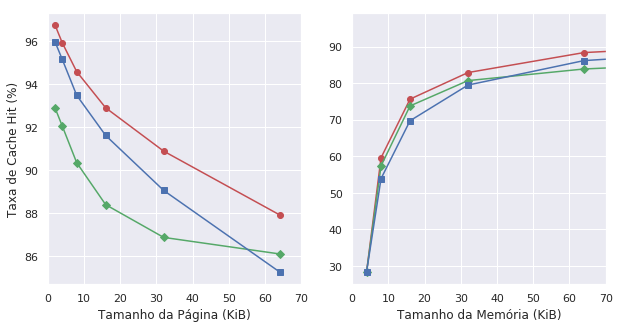

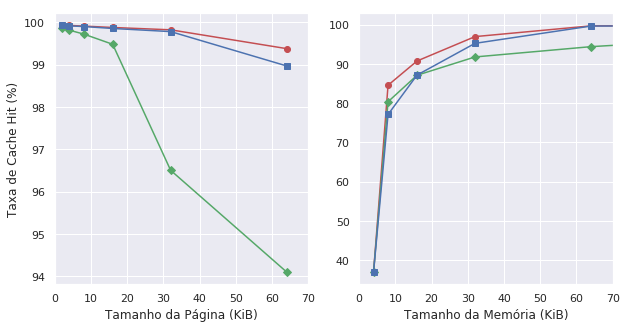

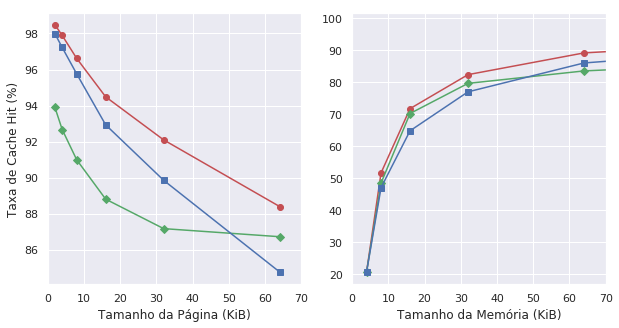

<Figure size 720x360 with 0 Axes>

In [59]:
for e in entradas:
    
    plt.subplot("121")
    plt.xlim(0, 70)
    plt.ylabel('Taxa de Cache Hit (%)')
    #plt.title("Variação do tamanho da página")
    plt.plot(dicionario[e]['lru'][1], dicionario[e]['lru'][0], '-ro', dicionario[e]['nru'][1], dicionario[e]['nru'][0], '-gD', dicionario[e]['segunda_chance'][1], dicionario[e]['segunda_chance'][0], '-bs')
    plt.xlabel('Tamanho da Página (KiB)')
    
    plt.subplot("122")
    plt.xlim(0, 70)
    #ax2.set_title("Variação do tamanho da memória")
    plt.plot(dicionario[e]['lru'][3], dicionario[e]['lru'][2], '-ro', dicionario[e]['nru'][3], dicionario[e]['nru'][2], '-gD', dicionario[e]['segunda_chance'][3], dicionario[e]['segunda_chance'][2], '-bs')
    plt.xlabel("Tamanho da Memória (KiB)")
   
    plt.show()
    plt.figure().savefig('../Plots/'+e.replace(".log", "")+".svg")